In [41]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('geo_tweets_with_depts_and_tone.csv')

In [42]:
department = 'Bogotá Distrito Capital'
proportion = False
include_retweets = True

# Create a line plot of the frequency (count) of positive, neutral and negative tweets over time on Bogotá
all_departments = data.copy()
if not include_retweets:
    all_departments = all_departments.drop_duplicates(subset=['text'], keep=False)

all_departments['date'] = pd.to_datetime(all_departments['date'])
all_departments['month'] = all_departments['date'].dt.to_period('M')
all_departments['year'] = all_departments['date'].dt.to_period('Y')

df_with_tone_sample = all_departments[all_departments['department'] == department]
df_with_tone_sample = df_with_tone_sample.groupby(['year', 'month', 'tone']).size().reset_index(name='count')
df_with_tone_sample = df_with_tone_sample.pivot_table(index=['year', 'month'], columns='tone', values='count').reset_index()
df_with_tone_sample = df_with_tone_sample.fillna(0)

df_with_tone_sample['total'] = df_with_tone_sample['negative'] + df_with_tone_sample['neutral'] + df_with_tone_sample['positive']

color_mapping = {
    'positive': 'blue',
    'neutral': 'gray',
    'negative': 'red'
}

if proportion:
    df_with_tone_sample['negative'] = df_with_tone_sample['negative']/df_with_tone_sample['total']
    df_with_tone_sample['neutral'] = df_with_tone_sample['neutral']/df_with_tone_sample['total']
    df_with_tone_sample['positive'] = df_with_tone_sample['positive']/df_with_tone_sample['total']

    
    df_with_tone_sample = df_with_tone_sample.drop(columns=['total'])

    df_with_tone_sample = df_with_tone_sample.melt(id_vars=['year', 'month'], var_name='tone', value_name='proportion')
    df_with_tone_sample['month'] = df_with_tone_sample['month'].astype(str)

    fig = px.line(df_with_tone_sample, x='month', y='proportion', color='tone', line_group='year',
                title=f'Proportion of Positive, Neutral and Negative Tweets in {department} over time', color_discrete_map=color_mapping)

    fig.show()
else:
    df_with_tone_sample = df_with_tone_sample.drop(columns=['total'])
    df_with_tone_sample = df_with_tone_sample.melt(id_vars=['year', 'month'], var_name='tone', value_name='count')
    df_with_tone_sample['month'] = df_with_tone_sample['month'].astype(str)

    fig = px.line(df_with_tone_sample, x='month', y='count', color='tone', line_group='year',
                title=f'Frequency of Positive, Neutral and Negative Tweets in {department} over time', color_discrete_map=color_mapping)

    fig.show()


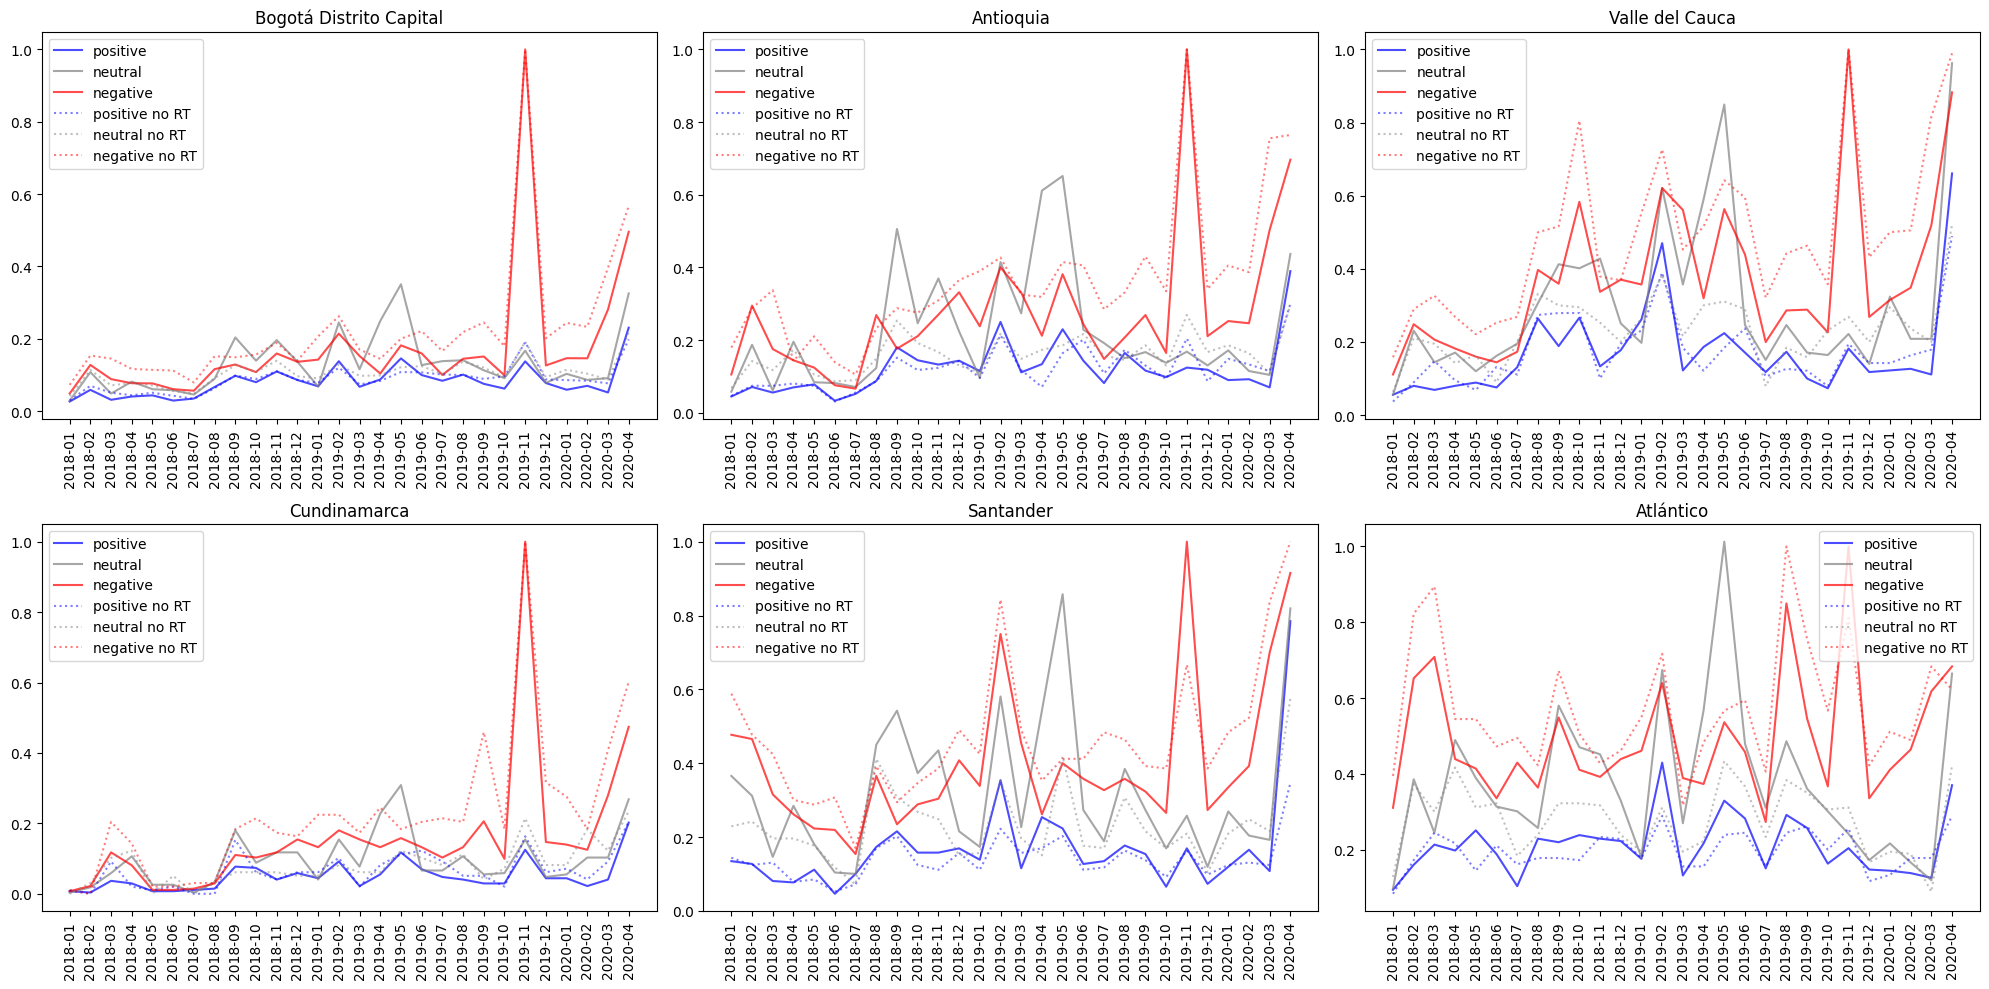

In [63]:
# Create 6 line plots (using plt) of the frequency (count) of positive, neutral and negative tweets over time for 6 departments defined by the user, in a 2x3 grid/ Including a start date and end date for the time period
departments = ['Bogotá Distrito Capital', 'Antioquia', 'Valle del Cauca', 'Cundinamarca', 'Santander', 'Atlántico']
proportion = False
# include_retweets = False
start_date = '2018-01-01'
end_date = '2020-04-01'


color_mapping = {
    'positive': 'blue',
    'neutral': 'gray',
    'negative': 'red',
    'positive no RT': 'blue',
    'neutral no RT': 'gray',
    'negative no RT': 'red'
}

all_departments = data.copy()
# if not include_retweets:
#     all_departments = all_departments.drop_duplicates(subset=['text'], keep=False)
    
all_departments['date'] = pd.to_datetime(all_departments['date'])
all_departments = all_departments[(all_departments['date'] >= start_date) & (all_departments['date'] <= end_date)]
all_departments['month'] = all_departments['date'].dt.to_period('M')
all_departments['year'] = all_departments['date'].dt.to_period('Y')

if not proportion:
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    for i, department in enumerate(departments):
        df_with_tone_sample = all_departments[all_departments['department'] == department]
        df_with_tone_sample = df_with_tone_sample.groupby(['year', 'month', 'tone']).size().reset_index(name='count')
        df_with_tone_sample = df_with_tone_sample.pivot_table(index=['year', 'month'], columns='tone', values='count').reset_index()
        df_with_tone_sample = df_with_tone_sample.fillna(0)

        df_with_tone_sample['total'] = df_with_tone_sample['negative'] + df_with_tone_sample['neutral'] + df_with_tone_sample['positive']
        # Standardize the data (1 is the maximum value)
        max_value = df_with_tone_sample['negative'].max()
        df_with_tone_sample['total'] = df_with_tone_sample['total']/max_value
        df_with_tone_sample['negative'] = df_with_tone_sample['negative']/max_value
        df_with_tone_sample['neutral'] = df_with_tone_sample['neutral']/max_value
        df_with_tone_sample['positive'] = df_with_tone_sample['positive']/max_value

        df_with_tone_sample = df_with_tone_sample.drop(columns=['total'])
        df_with_tone_sample = df_with_tone_sample.melt(id_vars=['year', 'month'], var_name='tone', value_name='count')
        df_with_tone_sample['month'] = df_with_tone_sample['month'].astype(str)

        plt.subplot(2, 3, i+1)
        for tone in ['positive', 'neutral', 'negative']:
            df_tone = df_with_tone_sample[df_with_tone_sample['tone'] == tone]
            plt.plot(df_tone['month'], df_tone['count'], label=tone, color=color_mapping[tone], alpha=0.7)
        plt.title(f'{department}')
        plt.legend()
        plt.xticks(rotation=90)
        
        
all_departments = all_departments.drop_duplicates(subset=['text'], keep=False)
    
all_departments['date'] = pd.to_datetime(all_departments['date'])
all_departments = all_departments[(all_departments['date'] >= start_date) & (all_departments['date'] <= end_date)]
all_departments['month'] = all_departments['date'].dt.to_period('M')
all_departments['year'] = all_departments['date'].dt.to_period('Y')

if not proportion:
    for i, department in enumerate(departments):
        df_with_tone_sample = all_departments[all_departments['department'] == department]
        df_with_tone_sample = df_with_tone_sample.groupby(['year', 'month', 'tone']).size().reset_index(name='count')
        df_with_tone_sample = df_with_tone_sample.pivot_table(index=['year', 'month'], columns='tone', values='count').reset_index()
        df_with_tone_sample = df_with_tone_sample.fillna(0)

        df_with_tone_sample['negative no RT'] = df_with_tone_sample['negative']
        df_with_tone_sample['neutral no RT'] = df_with_tone_sample['neutral']
        df_with_tone_sample['positive no RT'] = df_with_tone_sample['positive']
        
        df_with_tone_sample['total no RT'] = df_with_tone_sample['negative no RT'] + df_with_tone_sample['neutral no RT'] + df_with_tone_sample['positive no RT']
        # Standardize the data (1 is the maximum value)
        max_value = df_with_tone_sample['negative no RT'].max()
        df_with_tone_sample['total no RT'] = df_with_tone_sample['total no RT']/max_value
        df_with_tone_sample['negative no RT'] = df_with_tone_sample['negative no RT']/max_value
        df_with_tone_sample['neutral no RT'] = df_with_tone_sample['neutral no RT']/max_value
        df_with_tone_sample['positive no RT'] = df_with_tone_sample['positive no RT']/max_value

        df_with_tone_sample = df_with_tone_sample.drop(columns=['total no RT','negative', 'neutral', 'positive'])
        df_with_tone_sample = df_with_tone_sample.melt(id_vars=['year', 'month'], var_name='tone', value_name='count')
        df_with_tone_sample['month'] = df_with_tone_sample['month'].astype(str)

        plt.subplot(2, 3, i+1)
        for tone in ['positive no RT', 'neutral no RT', 'negative no RT']:
            df_tone = df_with_tone_sample[df_with_tone_sample['tone'] == tone]
            plt.plot(df_tone['month'], df_tone['count'], label=tone, color=color_mapping[tone], alpha=0.5, linestyle='dotted')
        plt.title(f'{department}')
        plt.legend()
        plt.xticks(rotation=90)

# Save the plot to svg
plt.tight_layout()
plt.savefig('tone_by_department.svg')

In [76]:
# Table of how much is the difference in proportion of tone between tweets with retweets and without retweets
# Example:
# department | negative | neutral | positive
# Bogotá Distrito Capital | -0.1 | +0.2 | +0.03
import pandas as pd

# Assuming data is your original DataFrame
data2 = data.copy()

# Initialize an empty DataFrame for the results
proportion_diff = pd.DataFrame(columns=['department', 'negative', 'neutral', 'positive'])

# Loop over each department
for department in data2['department'].unique():
    # Filter data by department
    df_sample = data2[data2['department'] == department]
    
    # Create a subset without retweets (assuming 'text' is a unique identifier for a tweet)
    df_sample_no_RT = df_sample.drop_duplicates(subset=['text'], keep=False)
    
    # Group by tone and calculate counts for both sets (with and without RT)
    df_sample = df_sample.groupby('tone').size().reset_index(name='count')
    df_sample_no_RT = df_sample_no_RT.groupby('tone').size().reset_index(name='count')
    
    # Merge the two sets on 'tone' to handle cases where a tone might be missing in one of the sets
    df_combined = pd.merge(df_sample, df_sample_no_RT, on='tone', how='outer', suffixes=('', '_no_RT')).fillna(0)
    
    # Calculate proportions for both sets
    df_combined['proportion'] = df_combined['count'] / df_combined['count'].sum()
    df_combined['proportion_no_RT'] = df_combined['count_no_RT'] / df_combined['count_no_RT'].sum()
    
    # Calculate the difference in proportions
    df_combined['diff'] = df_combined['proportion'] - df_combined['proportion_no_RT']
    
    # Extract the differences for negative, neutral, and positive tones
    negative_diff = df_combined[df_combined['tone'] == 'negative']['diff'].values[0] if 'negative' in df_combined['tone'].values else 0
    neutral_diff = df_combined[df_combined['tone'] == 'neutral']['diff'].values[0] if 'neutral' in df_combined['tone'].values else 0
    positive_diff = df_combined[df_combined['tone'] == 'positive']['diff'].values[0] if 'positive' in df_combined['tone'].values else 0
    
    # Create a temporary DataFrame for the current department's data
    temp_df = pd.DataFrame({
        'department': [department], 
        'negative': [negative_diff], 
        'neutral': [neutral_diff], 
        'positive': [positive_diff]
    })
    
    # Use pd.concat instead of append to add the row to proportion_diff
    proportion_diff = pd.concat([proportion_diff, temp_df], ignore_index=True)

# Print the final table
print(proportion_diff)


# Save the table to an Excel file
proportion_diff.to_excel('tone_proportion_diff.xlsx', index=False)

                  department  negative   neutral  positive
0    Bogotá Distrito Capital -0.069792  0.070146 -0.000355
1                    Bolívar -0.055117  0.066845 -0.011729
2         Norte de Santander -0.041080  0.050017 -0.008936
3                     Boyacá -0.098134  0.122978 -0.024844
4                      Cesar -0.065996  0.059633  0.006363
5                  Antioquia -0.069368  0.069978 -0.000610
6                  Santander -0.066546  0.058302  0.008244
7                    Quindío -0.030317  0.032062 -0.001745
8            Valle del Cauca -0.064431  0.059626  0.004804
9                  Atlántico -0.052039  0.054006 -0.001968
10                 Risaralda -0.023367  0.029656 -0.006289
11                     Huila -0.052340  0.071439 -0.019099
12                 Magdalena -0.059383  0.083318 -0.023934
13                   Córdoba -0.028179  0.038904 -0.010725
14                    Nariño -0.051863  0.048878  0.002985
15                    Tolima -0.017971  0.027327 -0.0093